<a href="https://colab.research.google.com/github/NaughtyYoda/Disney-Land-Reviews/blob/main/Disneyland_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
The following report provides a scrupulous analysis for the disneyland review dataset. 

This analysis aims to report insights on questions such as :  

- Which branch has the highest number of reviews ?
- What is the peak time to visit a disneyland branch ?
- What are the major groups visitiing the disneyland branches ?
- What is the distribution of overall ratings ?

This analysis also reports the noise or impurity in text data by generating additional features from reviews such as review length and review word count.

# <a id=toc>TABLE OF CONTENTS</a>

1. [Insights](#ins)
2. [Essential Libraries](#lib)
3. [Load Data](#ld)
4. [Data Exploration](#de)
5. [Exploratory Data Analysis](#eda)
6. [Check Impurity Text Data](#imp)

# <a id=ins>1. INSIGHTS</a>
- The dataset contains 42656 reviews from a time period between 2010 to 2019. Every review is uniquely identified by a Review ID (primary key for this dataset). However, 20 dupicate review IDs were found and these reviews also had the same information. Hence were removed from the analysis.  
- Disneyland California has the highest number of reviews (approx 46%), followed by Paris (approx.32 %) and Hong Kong (approx 23%).
- The peak time to visit all the three disneyland is Quater 3 (July, August and September). The data of period 2014-2019 was used for this analysis to analyse the current trends.
- Overall, for Diseyland land Hong Kong, the majority of the visits were from Australia. For Disneyland Califirnia, majority visits were from United States. For Disneyland Paris, majority visits were from United Kingdom. US and Australia are the 2 countries that come in Top 5 list for the three disneyland branches.
  - However, above stated patterns change if we just take the data of last five years (2014-2019). Suprisingly, for every branch, the major groups visiting these parks are same. i.e., U.S., U.K. Canada, Australia and India.
- Approximately 54% reviews have a 5 star rating. The number of reviews with ratings 1-4 across all the disneyland branches were quite similar. However, Dineyland California has higher proportion of 5 star reviews as compared to other parks.
- The relationship between review length and review word count was linear. However, There were some reviews with low review length and extremely high word count. All these reviews were of Disneyland Hong Kong branch.

[Back to index](#toc)

# <a id =lib>2. ESSENTIAL LIBRARIES</a>

[Back to index](#toc)

In [1]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from zipfile import ZipFile

# visualizations
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
import plotly.express as px # 
import plotly.graph_objects as go # 
from statsmodels.graphics.gofplots import qqplot 

# text data
import re 
import string

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# <a id=ld>3. LOAD DATA</a>

[Back to index](#toc)

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Github/DisneylandReviews.csv'
df = pd.read_csv(file_path, 
                 encoding='ISO-8859-1', 
                 na_values='missing' )

In [3]:
# first five rows
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
# last five rows
df.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,NaN,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


# <a id=de>4. DATA EXPLORATION</a>

[Back to index](#toc)

## 4.1 Dataset shape
The dataset consists of 42656 rows (reviews) and 6 columns/attributes.

In [5]:
# dataset shape
df.shape

(42656, 6)

## 4.2 Data Types
For more detailed information about data types and description please refer to the [README.md file](https://github.com/NaughtyYoda/Disney-Land-Reviews/blob/main/README.md)

In [6]:
# data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         40043 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


## 4.3 Missing Values
Only `Year_Month` column consists of approx 6% missing values.

In [7]:
# percentage of missing values
df.isnull().sum()/len(df)*100

Review_ID            0.00000
Rating               0.00000
Year_Month           6.12575
Reviewer_Location    0.00000
Review_Text          0.00000
Branch               0.00000
dtype: float64

## 4.4 Descriptive Statistics
- The descriptive statistics show that there are some dupicate reviews as mode of review is 2.
- Also, Disneyland California has the highest number of reviews.

In [8]:
# descriptive statistics
df.describe(include='all')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
count,4.265600e+04,42656.000000,40043,42656,42656,42656
unique,NaN,NaN,111,162,42632,3
top,NaN,NaN,2015-8,United States,I love visiting here with my girlfriend but it...,Disneyland_California
freq,NaN,NaN,786,14551,2,19406
mean,3.188553e+08,4.217695,NaN,NaN,NaN,NaN
std,1.657092e+08,1.063371,NaN,NaN,NaN,NaN
min,1.398724e+06,1.000000,NaN,NaN,NaN,NaN
25%,1.743274e+08,4.000000,NaN,NaN,NaN,NaN
50%,2.907583e+08,5.000000,NaN,NaN,NaN,NaN
75%,4.489579e+08,5.000000,NaN,NaN,NaN,NaN


## 4.5 Duplicate Reviews
- As suspected there are 20 dupicate review ID's
- Also, not only the review ID is same but the information in them is same as well (as shown in 2 examples below).

In [9]:
# duplicate reviews
df['Review_ID'].value_counts()[:21]

121586148    2
129231609    2
164830205    2
129207323    2
166787635    2
121615246    2
166753649    2
121580686    2
121568004    2
166754595    2
166787525    2
129214104    2
166784597    2
166730734    2
121578357    2
121615136    2
226905150    2
121570980    2
164862064    2
168489234    2
126188805    1
Name: Review_ID, dtype: int64

In [10]:
# example 1
df[df.Review_ID == 166787525]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24016,166787525,4,2013-7,Ireland,Was great. Disney could have done a better cro...,Disneyland_California
24024,166787525,4,2013-7,Ireland,Was great. Disney could have done a better cro...,Disneyland_California


In [11]:
# example 2
df[df.Review_ID == 129231609]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
8814,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8823,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong


In [12]:
# drop duplicate reviews
df.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
df.shape

(42636, 6)

# <a id=eda>5. EXPLORATORY DATA ANALYSIS (EDA)</a>

[Back to index](#toc)

## 5.1 Number of reviews for the three Disneyland branches
Disneyland Califoria has the highest percentage of reviews (approx. 46%).

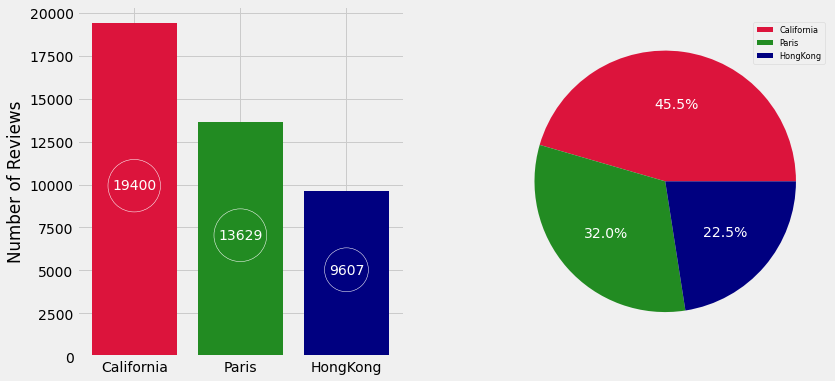

In [13]:
branch_count = df.Branch.value_counts()
branch_col = ['crimson', 'forestgreen', 'navy']
# remove extra characters from branch name
branch_name = [branch[11:] for branch in branch_count.index] 

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.3)
    # plot 1
    ax[0].bar(branch_name, 
              branch_count.values, 
              color=branch_col)
    for x , y, col in zip(branch_name, 
                     branch_count.values, branch_col):
        ax[0].text(x, y/2, y, 
                   ha='center',color='white', 
                   bbox=dict(facecolor=col, edgecolor='white', boxstyle='circle'))
    ax[0].set_ylabel('Number of Reviews')
    # plot 2
    ax[1].pie(x=branch_count.values, 
              #labels=branch_name,
              colors=branch_col,  
              autopct='%1.1f%%', textprops=dict(color='white'))
    ax[1].legend(labels=branch_name, loc='upper right', fontsize="xx-small")


## 5.2 Peak time to visit Disneyland
The peak time is computed by counting the reviews/visits in all the quaters for a repective disneyland branch. Note only data from 2014 - 2019 was included in this analysis, to analyse the current trend.

In [14]:
# drop missing dates
no_missing = df.dropna().reset_index()

# extract year 
no_missing['Year'] = no_missing['Year_Month'].apply(lambda x: int(re.split('-', x)[0]))

# extract month
no_missing['Month'] = no_missing['Year_Month'].apply(lambda x: int(re.split('-', x)[1]))

# computes quater using month number
no_missing['Quater'] = no_missing['Month'].apply(lambda x: (x-1)//3+1)

In [15]:
no_missing.sample()

,index,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,Quater
1187,1190,570718841,5,2018-4,United States,This Disneyland is smaller than others I ve ...,Disneyland_HongKong,2018,4,2


The below figure indicates that Quater 3 is the most busiest period to visit Disneyland for all the Disneyland branches.

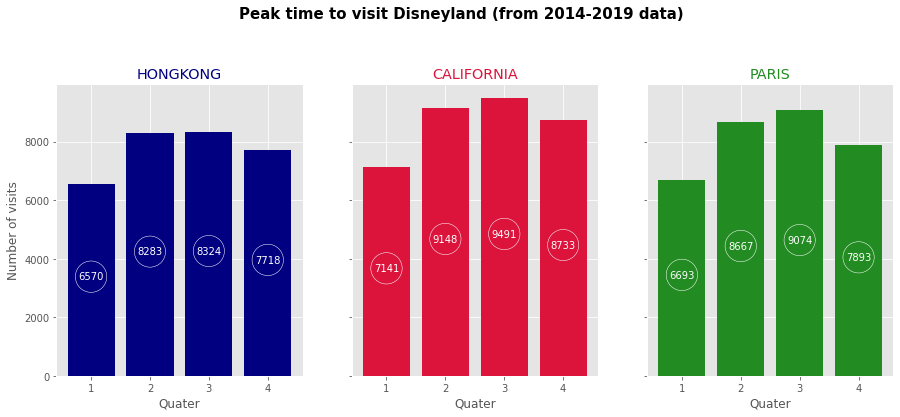

In [16]:
# plot
branch_col = ['navy', 'crimson', 'forestgreen']
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    plt.subplots_adjust(top=0.8)
    for i, (branch, col) in enumerate(zip(no_missing.Branch.unique(), branch_col)):
        counts = no_missing[(no_missing.Branch == branch)|(no_missing.Year>=2014)]['Quater'].value_counts()
        x = counts.index
        y = counts.values
        ax[i].bar(x, y, color=col, label=branch)
        for q, val in zip(x, y):
            ax[i].text(q, val/2, val, ha='center', 
                       color='white', 
                       bbox=dict(facecolor=col, edgecolor='white', boxstyle="circle"))
        ax[i].set_xlabel('Quater')
        ax[0].set_ylabel('Number of visits')
        ax[i].set_title(branch.upper()[11:], color=col)
    fig.suptitle('Peak time to visit Disneyland (from 2014-2019 data)', fontsize=15, fontweight='semibold')
    fig.show()

In [17]:
fig = go.Figure()
for i, (branch, col) in enumerate(zip(no_missing.Branch.unique(), branch_col)):
    counts = no_missing[(no_missing.Branch == branch)|(no_missing.Year>=2014)]['Quater'].value_counts()
    x = counts.index
    y = counts.values
    fig.add_trace(go.Bar(x=x, y=y, name=branch[11:], marker_color=col, text=y))
fig.update_traces(textposition='inside')
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  template='ggplot2', 
                  title='Peak time to visit Disneyland (from 2014-2019 data) ')
fig.show()

## 5.3 Major Groups visiting Disneyland branches
The major groups refer to the countries from were people are visiting the three branches frequently. 
- For Diseyland land Hong Kong, the majority of the visits have from Australia. 
- For Disneyland Califirnia, majority visits are from United States.
- For Disneyland Paris, majority visits are from United Kingdom.
- US and Australia are the 2 countries that come in Top 5 list for the three disneyland branches.

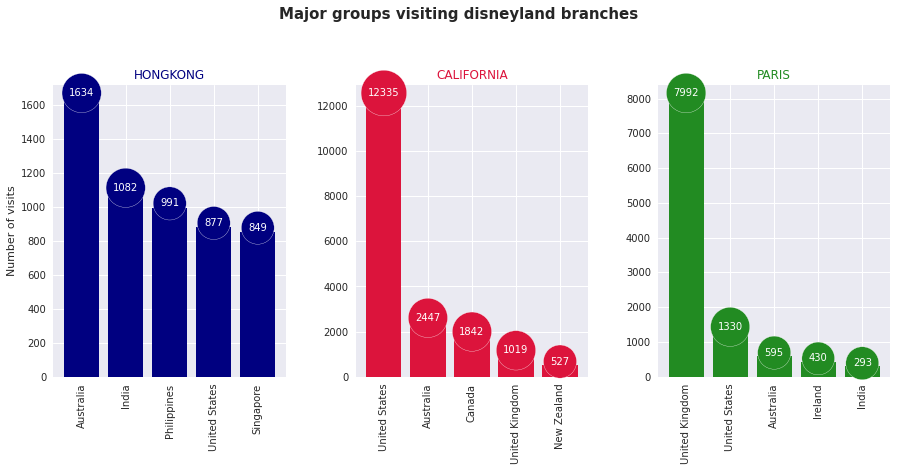

In [18]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))
    plt.subplots_adjust(top=0.8, wspace=0.3)
    for i, (branch, col) in enumerate(zip(df.Branch.unique(), branch_col)):
        # count the reviews for a particular disneyland branch
        loc_count = df[df.Branch == branch]['Reviewer_Location'].value_counts()[:5]
        # plot
        x = loc_count.index
        y = loc_count.values
        ax[i].bar(x, y, color=col)
        ax[0].set_ylabel('Number of visits')
        ax[i].set_title(branch.upper()[11:], color=col)
        ax[i].tick_params(axis='x', rotation=90)
        for c, val in zip(x, y):
            ax[i].text(c, val*1.01, val, ha='center', color='white',
                       bbox=dict(facecolor=col, 
                                 edgecolor='white', 
                                 boxstyle="circle", pad=0.7))
    fig.suptitle('Major groups visiting disneyland branches', 
                     fontsize=15, fontweight='semibold')
    fig.show()

- However, above stated patterns change if we just take the data of last five years (2014-2019).
- Suprisingly, for every branch, the major groups visiting these parks are same. i.e., U.S., U.K. Canada, Australia and India.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



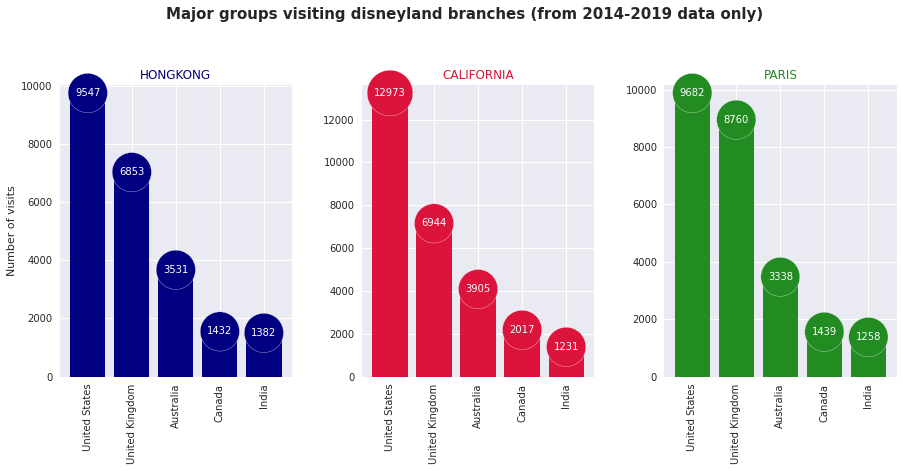

In [19]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))
    plt.subplots_adjust(top=0.8, wspace=0.3)
    for i, (branch, col) in enumerate(zip(no_missing.Branch.unique(), branch_col)):
        # count the reviews for a particular disneyland branch
        loc_count = no_missing[(df.Branch == branch)|(no_missing.Year>=2014)]['Reviewer_Location'].value_counts()[:5]
        # plot
        x = loc_count.index
        y = loc_count.values
        ax[i].bar(x, y, color=col)
        ax[0].set_ylabel('Number of visits')
        ax[i].set_title(branch.upper()[11:], color=col)
        ax[i].tick_params(axis='x', rotation=90)
        for c, val in zip(x, y):
            ax[i].text(c, val*1.01, val, ha='center', color='white',
                       bbox=dict(facecolor=col, 
                                 edgecolor='white', 
                                 boxstyle="circle", pad=0.7))
    fig.suptitle('Major groups visiting disneyland branches (from 2014-2019 data only)', 
                     fontsize=15, fontweight='semibold')
    fig.show()

## 5.4 Distributions of Rating
Majority reviews have a 5 rating.

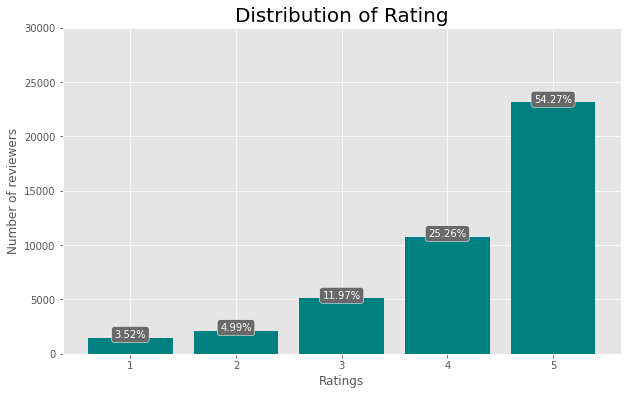

In [20]:
rating_count = df.Rating.value_counts()
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 6))
    plt.bar(rating_count.index, rating_count.values, color='teal')
    for r, val in zip(rating_count.index, rating_count.values):
        plt.text(r, val, 
                 str(round(val/sum(rating_count.values)*100, 2))+'%', 
                 ha='center', color='white', 
                 bbox=dict(facecolor='dimgrey', edgecolor='white', boxstyle="round"))
    plt.xlabel('Ratings')
    plt.ylabel('Number of reviewers')
    plt.title('Distribution of Rating', fontsize=20)
    plt.yticks(np.arange(0, 30001, 5000))

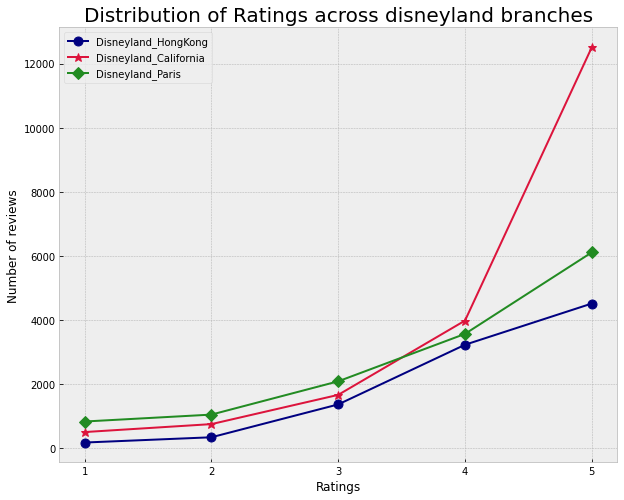

In [21]:
markers = ['o', '*', 'D']
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 8))
    for branch, m, col in zip(df.Branch.unique(), markers, branch_col):
        counts = df[df.Branch == branch]['Rating'].value_counts()
        x = counts.index
        y = counts.values
        plt.plot(x, y, marker=m, markersize=9, color=col, label=branch)
        plt.xticks(np.arange(1, 6))
        plt.xlabel('Ratings')
        plt.ylabel('Number of reviews')
    plt.title('Distribution of Ratings across disneyland branches', fontsize=20)
    plt.legend()
    plt.show()

- **press the play button**

In [22]:
px.bar(no_missing.groupby(['Year', 'Rating']).agg({'Review_ID': 'count'}).reset_index(), 
       x='Rating', 
       y='Review_ID', 
       animation_frame='Year', 
       title='Distribution of Ratings over time')

# <a id=imp>6. CHECK IMPURITY IN TEXT DATA</a> 

## 6.1 Generate Additional Features

Two features additional features review length and review word count are generated from feature `Review_Text`.
- **Review Length** - It is the number of characters in a review, minus the spaces(whitespace).
- **Review word count** - It is the number of words in a review

In [23]:
# review length
df['review_len'] = df.Review_Text.apply(lambda x: len(x) - x.count(' '))

# word count
df['word_count'] = df['Review_Text'].apply(lambda x: len(x.split(' ')))

- It is quit obvious that the relationship between the review length an the word count would be linear. But the plot below indicates some impurity in reviews for the Hong Kong branch. There are some data points with a small review length but a extremly large word count, deviating away from the linear trend. Further analysis needs to be conducted.


In [24]:
px.scatter(df, x='review_len', y='word_count', animation_frame='Branch', title='Scatter plot of Review length and word count')

## 6.2 Function to check impurity
The below function searches for all the characters defined in RE_SUSPICIOUS

In [25]:
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')
def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text"""
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)*100

In [26]:
# apply function
df['impurity'] = df['Review_Text'].apply(impurity)

- After applying the function to the dataframe, the dataframe is sorted with respect to the percentage of impurity in decending order.
- It can be observed that there is maximum 3% impurity in the data.
- 94.5% reviews dont contain these suspicious characters.

In [27]:
df.sort_values(by='impurity', ascending=False).head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,review_len,word_count,impurity
2923,447933822,5,2016-12,India,Rides & shows & Christmas parades & restaurant...,Disneyland_HongKong,135,35,2.958580
41212,130391661,4,2012-5,United Kingdom,Whole experience & variety of rides but dislik...,Disneyland_Paris,75,16,2.222222
29255,651884024,5,2019-2,United Kingdom,Hit: Space Mountain & Terror Towers. Miss: Ro...,Disneyland_Paris,88,21,1.851852
9176,121578357,5,2011-12,Singapore,Like all the rides & show. Took photo with som...,Disneyland_HongKong,91,19,1.834862
8210,154623257,4,2013-1,Russia,One of the best place & the children really ha...,Disneyland_HongKong,87,23,1.834862


In [28]:
# reviews with 0 impurity
len(df[df['impurity'] == 0.0])/len(df)*100

94.49291678393845